<a href="https://colab.research.google.com/github/Dcal-dev/IC_PBL-Naelisalang/blob/main/Integrator_example_colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Colab 사용용
`colab` 에서 `github`를 사용할 때, `private repositories`일 경우 git clone을 하지 못하는 경우가 생겨 방법을 찾아왔다.

https://git-scm.com/book/ko/v2/Git-%EC%84%9C%EB%B2%84-SSH-%EA%B3%B5%EA%B0%9C%ED%82%A4-%EB%A7%8C%EB%93%A4%EA%B8%B0

1. 우선 `github Id`를 만든다. 
2. git에서 ssh를 생성하는 것은 다음 링크를 확인해서 천천히 따라하면 된다.
https://www.lainyzine.com/ko/article/creating-ssh-key-for-github/
3. ssh를 등록했으면 거의다 끝났다. 컴퓨터에 있는 `id_ed25519`파일을 업로드 해주면 된다.

출처: https://ndb796.tistory.com/562 [안경잡이개발자]

우선 다음 셀을 실행시켜 gogle drive를 mount한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/My Drive


In [6]:
from google.colab import files 
# 개인키 업로드 
uploaded = files.upload()

Saving id_ed25519 to id_ed25519


In [7]:
# .ssh 폴더 생성 및 개인키 넣기
!mkdir -p ~/.ssh/ 
!mv id_ed25519 ~/.ssh/id_ed25519 
!chmod 400 ~/.ssh/id_ed25519

In [8]:
# 알려진 호스트(known hosts)에 GitHub 호스트 주소 넣기 
!ssh-keyscan -t ed25519 github.com >> ~/.ssh/known_hosts 
!ssh -T git@github.com

# github.com:22 SSH-2.0-babeld-92f10f70
Hi Dcal-dev! You've successfully authenticated, but GitHub does not provide shell access.


In [12]:
#연결해준 구글 드라이브로 이동
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [13]:
# private repository에서 소스코드 다운로드 
!git clone git@github.com:Dcal-dev/IC_PBL-Naelisalang.git

fatal: destination path 'IC_PBL-Naelisalang' already exists and is not an empty directory.


In [14]:
%cd IC_PBL-Naelisalang

/content/drive/MyDrive/IC_PBL-Naelisalang


In [16]:
from Integrator import RK2,RK4,leapfrog,Modified_Euler,Euler
import numpy as np
import matplotlib.pyplot as plt

# example code Lotka-Volterra equation 
$ \frac{dx}{dt} = \alpha x - \beta x y $  
$ \frac{dy}{dt} = \delta xy - \gamma y$  
> 1. x is the number of prey (for example, rabbits);  
> 2. y is the number of some predator (for example, foxes);  
> 3. $\frac {dy}{dt}$ and $\frac {dx}{dt}$ represent the instantaneous growth rates of the two populations;
> 4. t represents time;  
> 5. α, β, γ, δ are positive real parameters describing the interaction of the two species.  

In [17]:
def Lotka_Voltera(X,t,alpha,beta,delta,gamma):
    '''
    input : X,t, alpha,beta, delta, gamma
    함수를 만들어 줄때 받는요소 (X)를 앞으로 그뒤는 time array
    나머지 변수는 뒤쪽에
    ex) X,t, a,b,c,d,e.....
    '''
    x,y = X
    dx = alpha*x - beta*x*y
    dy = delta*x*y - gamma*y
    return np.array([dx,dy])
     
    

In [18]:
t = np.arange(0,100+0.01,0.01)
alpha,beta,delta,gamma =0.7,0.5,0.2,0.3

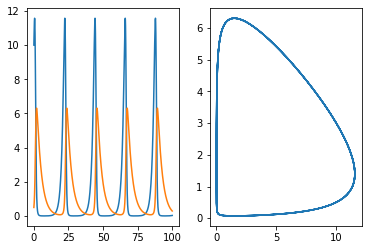

In [19]:
y_arr = RK2(Lotka_Voltera,[10,0.5],t,args =(alpha,beta,delta,gamma))
'''
integrator를 import 해서 쓸때에는 원하는 method를 고르고
method(함수,X,t, args = (a,b,c,d 함수에서 받는 것))
X는 array 혹은 list형태, [x,y,dx,dy]로 하거나, [x,y]
'''
x,y = y_arr.T

plt.subplot(121)
plt.plot(t,x,t,y)
plt.subplot(122)
plt.plot(x,y)

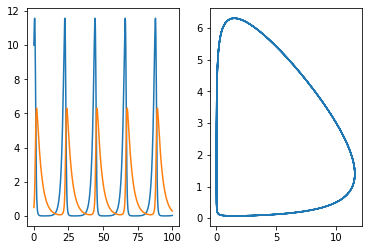

In [20]:
y_arr = RK4(Lotka_Voltera,[10,0.5],t,args =(alpha,beta,delta,gamma))
x,y = y_arr.T

plt.subplot(121)
plt.plot(t,x,t,y)
plt.subplot(122)
plt.plot(x,y)

In [ ]:
# y_arr = leapfrog(Lotka_Voltera,[0,0],[10,0.5],,args =(alpha,beta,delta,gamma))
# '''
# leapfrog를 쓸때는 f에 관한 함수와 df에 관한 함수를 모두 주어햐 한다.
# 일단 pass
# '''
# x,y = y_arr.T

# plt.subplot(121)
# plt.plot(t,x,t,y)
# plt.subplot(122)
# plt.plot(x,y)

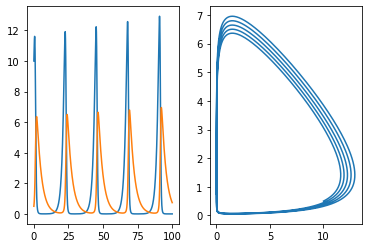

In [21]:
y_arr = Euler(Lotka_Voltera,[10,0.5],t,args =(alpha,beta,delta,gamma))
x,y = y_arr.T

plt.subplot(121)
plt.plot(t,x,t,y)
plt.subplot(122)
plt.plot(x,y)

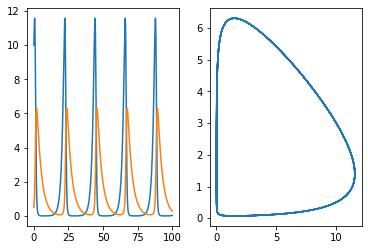

In [22]:
y_arr = Modified_Euler(Lotka_Voltera,[10,0.5],t,args =(alpha,beta,delta,gamma))
x,y = y_arr.T

plt.subplot(121)
plt.plot(t,x,t,y)
plt.subplot(122)
plt.plot(x,y)

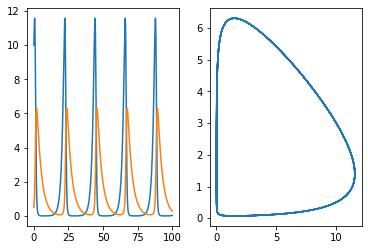

In [23]:
y_arr = Modified_Euler(Lotka_Voltera,[10,0.5],t,args =(alpha,beta,delta,gamma))
x,y = y_arr.T

plt.subplot(121)
plt.plot(t,x,t,y)
plt.subplot(122)
plt.plot(x,y)

In [26]:
!git branch 

* main
